### **Preço e retornos IBOV**

#### Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sweetviz as sv

c:\Users\luizp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from scipy import stats
import pylab

#### Importando dados do IBOV através da biblioteca YahooFinance

Importando os dados de fechamento do IBOV desde 01/01/2020

In [15]:
ibov = yf.download('^BVSP', start = '2000-01-1')['Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
ibov.head()

Date
2000-01-03    16930.0
2000-01-04    15851.0
2000-01-05    16245.0
2000-01-06    16107.0
2000-01-07    16309.0
Name: Close, dtype: float64

In [6]:
ibov = pd.DataFrame(ibov)

Transformando o index em um DateTime

In [17]:
ibov.index = pd.to_datetime(ibov.index, utc=True)

In [18]:
ibov.head()

Date
2000-01-03 00:00:00+00:00    16930.0
2000-01-04 00:00:00+00:00    15851.0
2000-01-05 00:00:00+00:00    16245.0
2000-01-06 00:00:00+00:00    16107.0
2000-01-07 00:00:00+00:00    16309.0
Name: Close, dtype: float64

### Histograma do fechamento diário de IBOV

In [19]:
fig = px.histogram(ibov, color_discrete_sequence=['lightseagreen'])

fig.add_vline(x=np.mean(ibov), line_width=3,  line_color="red")
fig.add_vline(x=np.median(ibov), line_width=3, line_dash="dash", line_color="red")

fig.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

Pelo o gráfico podemos concluir que não se trata de uma distribução normal, se aproxima distribuição trimodal, com três picos. No histograma podemos observar a média e a mediana.

#### **Quantile-Quantile Plot (Q-Q plot)**

O Quantile-Quantile Plot, ou Q-Q plot, é um gráfico utilizado na estatística para avaliar se uma distribuição de dados observados é semelhante à uma distribuição teórica esperada, como a distribuição normal. O eixo x do gráfico representa os quantis teóricos da distribuição esperada, enquanto o eixo y representa os quantis observados nos dados reais. Se os pontos no gráfico se aproximam de uma linha diagonal, isso sugere uma boa concordância entre os dados observados e a distribuição teórica. Desvios significativos dessa linha diagonal podem indicar desvios na distribuição dos dados em relação à distribuição esperada. O Q-Q plot é uma ferramenta útil na análise de normalidade e na identificação de desvios de distribuições teóricas.

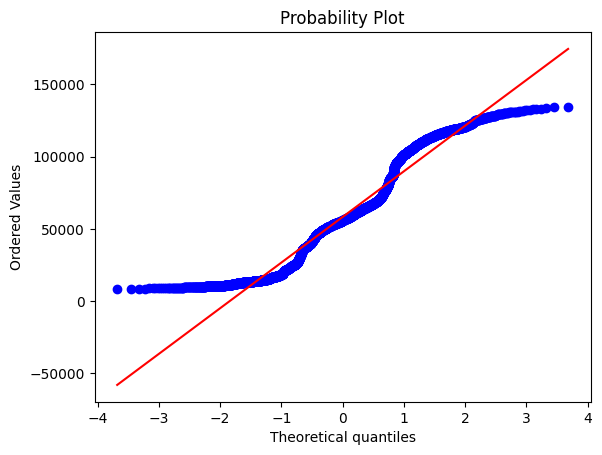

In [20]:
stats.probplot(ibov, dist="norm", plot=pylab)
pylab.show()

Analisando o gráfico podemos observar que nas extremidades temos grande parte da distrubuição fugindo da Normal. Confirmando que não é distribuição Normal.

Para realizar uma análise quatitativa, vamos trabalhar com os Retornos no lugar do preço de fechamento. Pois se aproximam mais de uma distrbuição Normal.

### Calculando o retorno diário do IBOV

In [22]:
retornos_ibov = ibov.pct_change()

In [23]:
retornos_ibov.head()

Date
2000-01-03 00:00:00+00:00         NaN
2000-01-04 00:00:00+00:00   -0.063733
2000-01-05 00:00:00+00:00    0.024856
2000-01-06 00:00:00+00:00   -0.008495
2000-01-07 00:00:00+00:00    0.012541
Name: Close, dtype: float64

Primeira linha mostra NAN pois não existe informação anterior. Vamos retirar o NAN através do DROPNA

In [24]:
retornos_ibov.dropna(inplace = True)

### Histograma com retornos diários

In [25]:
fig02 = px.histogram(retornos_ibov, color_discrete_sequence=['lightseagreen'])

fig02.add_vline(x=np.mean(retornos_ibov), line_width=3,  line_color="red")
fig02.add_vline(x=np.median(retornos_ibov), line_width=3, line_dash="dash", line_color="red")

fig02.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

Uma distribuição aproximadamente Normal, com média e mediana muito próximas.

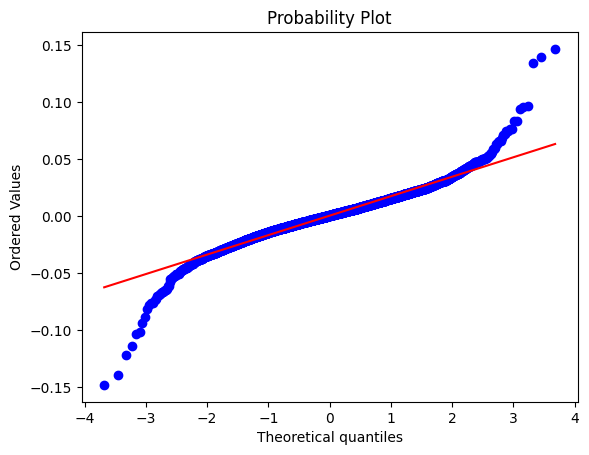

In [26]:
stats.probplot(retornos_ibov, dist="norm", plot=pylab)
pylab.show()

A maior parte da distribuição se aproxima da Normal, com alguns outliers nas extremidades

### Assimetria e curtose

In [28]:
print(f"Assimetria: {stats.skew(retornos_ibov)}")
print(f"Curtose: {stats.kurtosis(retornos_ibov, fisher=True)}")


Assimetria: -0.12243424963799211
Curtose: 6.312123329205688


Assismetria negativa - temos retornos diários normalmente maiores

Uma curtose positiva sugere uma distribuição mais concentrada em torno da média